# Our journey from analysis to prediction includes:

* **Understanding the data**
* **Data wrangling**
* **Descriptive analysis**
* **Exploratory data analysis (EDA)**
* **Predictive analysis (Polynomial Regression, Multiple Linear Regression, Support Vector Machine, Random Forest)**
* **Model Evaluation**

> ##   Importing Libraries
> * pandas: A library for data manipulation and analysis, offering powerful data structures like DataFrames for handling structured data efficiently.
> * numpy: A library for numerical computing, providing support for arrays, matrices, and high-level mathematical operations.
> * matplotlib.pyplot: A plotting library used for creating static, interactive, and animated visualizations.
> * seaborn: A data visualization library built on top of Matplotlib, offering a high-level interface for creating attractive and informative statistical graphics.
> * scipy.stats: A module within SciPy for performing statistical tests, probability distributions, and other statistical functions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

> ## Reading the Dataset with Pandas

In [2]:
data = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')

# 1. Understanding the Data
**Let’s take a closer look at our dataset to better understand its structure and content.**

> **Let’s use the shape attribute from pandas. It provides the number of rows and columns in a DataFrame, helping us understand the dataset’s structure.
We found that the dataset consists of 10,000 rows and 6 columns.**

In [3]:
data.shape

(10000, 6)

> **Let’s also use the head() function from pandas. It gives us a quick look at the first few rows of the dataset. By default, it shows the first 5 rows, but you can specify a different number by passing an argument, such as head(10) to display the first 10 rows.**

> **After displaying the data, it becomes clear that the target (dependent) column is the Performance Index, while the remaining columns are the independent variables. This target column will be our focus during the prediction phase, following the descriptive analysis and the exploratory data analysis (EDA) to uncover underlying patterns.**

In [4]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


> **Now, We will display the dtypes of each column to check if the data types are correct. Sometimes, a numerical value might be assigned the object data type instead of int, in which case we would need to correct it.
However, in the case of our dataset, everything appears to be in good order and correct.**

In [5]:
data.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

> **Let’s display information about the data using info(). This function performs the tasks of both the shape and dtypes attributes, but in addition, it shows the number of rows and columns, the data type of each column, and whether any column contains null values.**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


> **We will also use the describe() function. This function provides a summary of the numerical columns in the dataset, including the count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum values. It helps us understand the distribution and spread of the numerical data.**

In [7]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


# 2. Data wrangling  
**Data wrangling is the process of cleaning, transforming, and organizing raw data to ensure it's consistent, error-free, and ready for analysis.**

> **In the beginning, let’s use the value_counts() function, which counts the frequency of each unique value in a column. We’ll use it here to check for any unusual or noisy values, such as "?" or other**

> **After looping through all the columns, we’ll observe that there are no unusual or noisy values present.**

In [8]:
for i in data.columns.values.tolist():
    print(data[i].value_counts())
    print("------------")

Hours Studied
1    1152
6    1133
7    1129
3    1119
9    1115
5    1094
8    1088
4    1085
2    1085
Name: count, dtype: int64
------------
Previous Scores
54    216
87    208
56    192
62    184
89    182
60    181
53    181
77    181
52    176
58    176
57    176
49    175
66    175
65    175
84    175
91    175
97    174
79    174
40    173
83    173
75    172
70    172
93    172
47    172
92    172
90    172
42    171
44    170
48    170
95    169
41    169
67    168
43    167
73    166
61    165
78    165
88    164
59    163
63    163
46    163
86    162
81    161
71    159
99    159
85    159
96    159
98    158
45    154
69    153
80    153
68    153
82    148
94    148
72    148
64    147
55    144
74    143
76    142
51    140
50    123
Name: count, dtype: int64
------------
Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64
------------
Sleep Hours
8    1804
7    1676
6    1673
9    1622
4    1619
5    1606
Name: count, dtype: int64
------------
S

> **First, we’ll use the isnull() function, which replaces null values in the dataset with True and non-null values with False. Then, we’ll loop through the rows to count the number of True (null values) and False (non-null values).**

> **After displaying the result, it appears that the data does not contain any null values.**

In [9]:
missing_values = data.isnull()
for i in data.columns.values.tolist():
    print(missing_values[i].value_counts())
    print("--------------")

Hours Studied
False    10000
Name: count, dtype: int64
--------------
Previous Scores
False    10000
Name: count, dtype: int64
--------------
Extracurricular Activities
False    10000
Name: count, dtype: int64
--------------
Sleep Hours
False    10000
Name: count, dtype: int64
--------------
Sample Question Papers Practiced
False    10000
Name: count, dtype: int64
--------------
Performance Index
False    10000
Name: count, dtype: int64
--------------


# 3. Descriptive analysis 
**refers to the process of summarizing and understanding the main features of a dataset.**

> **Since our target is the students' current grades(Performance Index), we will begin by comparing the total of their previous grades(Previous Scores) with the current ones(Performance Index). This will help us understand any patterns or trends in the students' performance over time.**

> **We summed the values of the rows in the Previous Scores column and the Performance Index column, and then placed these two values into a DataFrame. We can also represent them as a pandas Series if needed.**

In [10]:
Previous_Performance=[[data["Previous Scores"].sum(axis=0), data["Performance Index"].sum(axis=0)]]

In [11]:
Previous_Performance=pd.DataFrame(Previous_Performance, columns=["Previous Scores", "Performance Index"])

In [12]:
Previous_Performance

,Previous Scores,Performance Index
0,694457,552248.0


> **After displaying the result and visualizing it with a bar chart, it becomes clear that the total scores of students in the previous exam are higher than in the current one, indicating that most students' scores have decreased.**

> **What do you think could have caused the drop in scores? Let’s continue exploring to understand the underlying factors.**

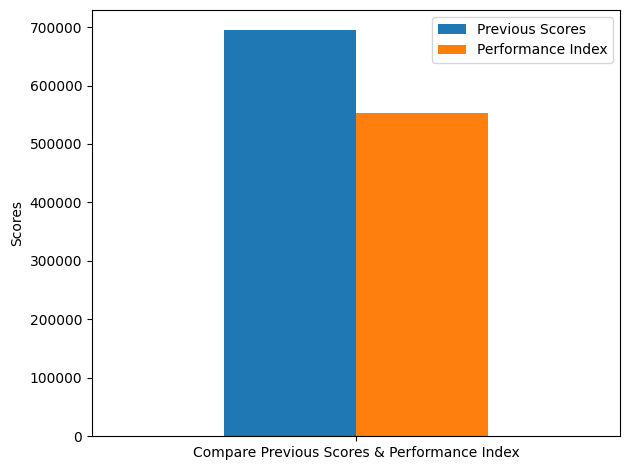

In [13]:
ax = Previous_Performance.plot(kind="bar", legend=True)

ax.set_xticks([0])  
ax.set_xticklabels(["Compare Previous Scores & Performance Index"])  

plt.xticks(rotation=0)  
plt.xlabel("") 
plt.ylabel("Scores")  
plt.tight_layout()
plt.show()


> **We will use a histogram to display the distribution of grades in the Previous Scores and Performance Index columns.**

> **From the histogram, we observe that the lowest score in the previous exam was 40, and the highest score was 99. However, in the current exam, there has been a significant drop in scores, with the lowest score reaching 10. Despite this, unlike the previous scores, we can see that the highest score in the current exam reached 100, indicating that some students achieved a perfect score.
Additionally, the frequency of students' grades in the previous exam is relatively evenly distributed across the grade categories. In contrast, in the current exam, the highest frequency of scores is found between the range of 37 and 73. The frequency decreases noticeably both below 37 and above 73.**

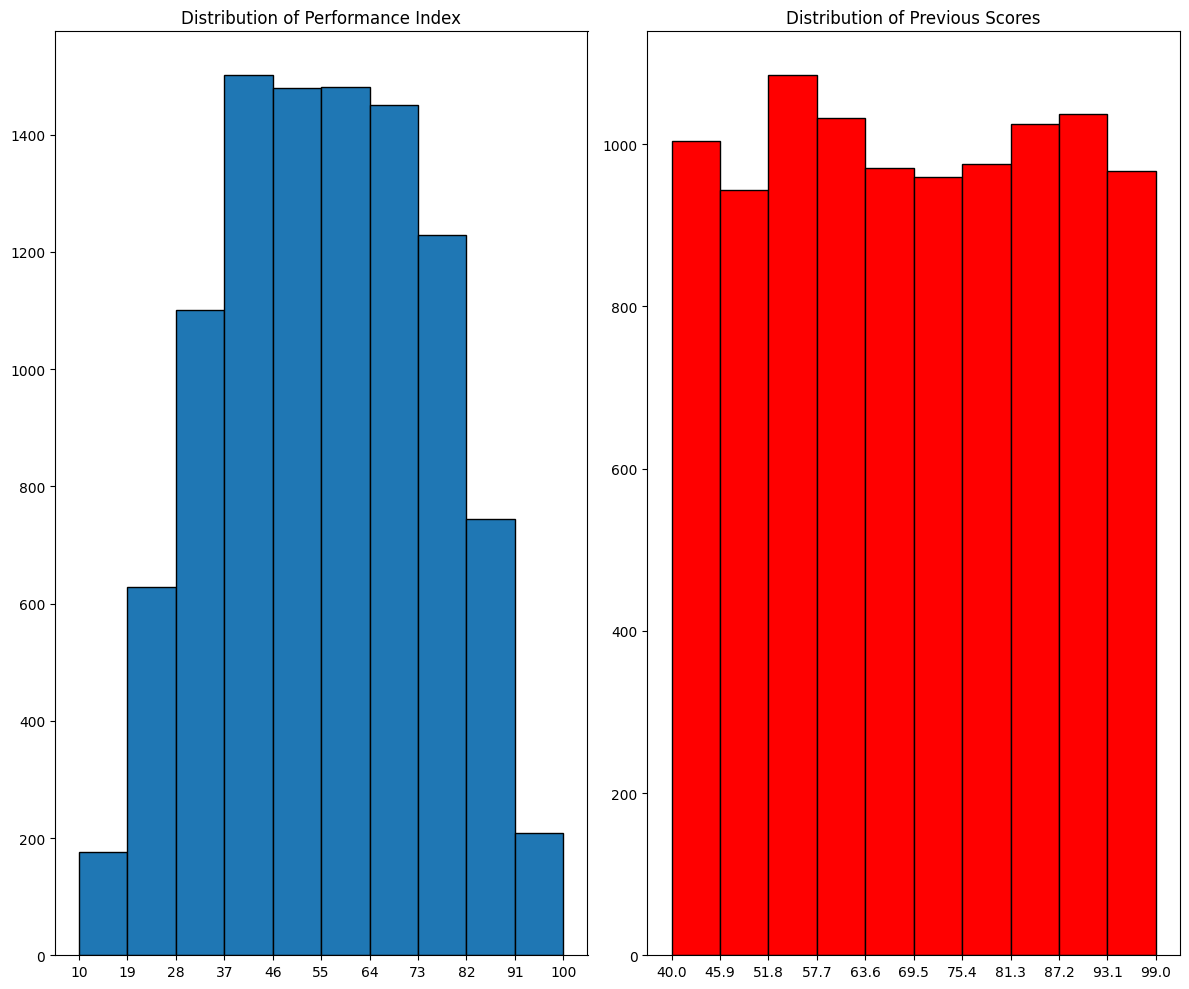

In [14]:
count, pin_edges = np.histogram(data["Performance Index"])
count2, pin_edges2 = np.histogram(data["Previous Scores"])

fig, axes = plt.subplots(1, 2, figsize=(12, 10))

axes[0].hist(data["Performance Index"], edgecolor="black")
axes[0].set_title("Distribution of Performance Index")
axes[0].set_xticks(pin_edges)

axes[1].hist(data["Previous Scores"], color ="red", edgecolor="black")
axes[1].set_title("Distribution of Previous Scores")
axes[1].set_xticks(pin_edges2)
plt.tight_layout()
plt.show()

> **Now, let's filter the data to determine the number of students whose scores have increased, decreased, or remained the same. We will compare the Previous Scores with the Performance Index to categorize the students into these three groups:**

> 1. Students whose scores have increased.
> 2. Students whose scores have decreased.
> 3. Students whose scores have remained the same.

> 1. **Students whose scores have increased.**

In [15]:
filter1 = data[(data["Performance Index"] > data["Previous Scores"])]
filter1.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
61,9,97,Yes,8,5,98.0
130,9,76,No,8,2,77.0
145,9,98,Yes,7,7,100.0
277,9,72,No,7,1,73.0
424,9,50,Yes,9,9,51.0


> 2. **Students whose scores have decreased.** 

In [16]:
filter2 = data[(data["Performance Index"] < data["Previous Scores"])]
filter2.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


> 3. **Students whose scores have remained the same.**

In [17]:
filter3 = data[(data["Performance Index"] == data["Previous Scores"])]
filter3.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
107,9,83,Yes,8,7,83.0
121,9,92,Yes,8,0,92.0
236,9,56,Yes,8,2,56.0
531,9,74,Yes,8,6,74.0
539,9,58,No,6,4,58.0


> **After filtering the data, we want to determine the number of students in each category (increased, decreased, or unchanged scores) and store these counts in a DataFrame. This will give us a clear overview of how many students fall into each group.**

In [18]:
Student_performance = {'Category': ['Students whose grades rose', 'Students whose grades dropped', 'Students whose grades have not changed'], 
                       'Values': [filter1.shape[0], filter2.shape[0], filter3.shape[0]]}

Student_performance = pd.DataFrame(Student_performance)
Student_performance.set_index("Category", inplace=True)
Student_performance

,Values
Category,
Students whose grades rose,101
Students whose grades dropped,9800
Students whose grades have not changed,99


> **After displaying the results and visualizing them with a pie chart, it becomes clear that 101 students' scores increased, which is about 1% of all students. On the other hand, 9,800 students' scores decreased, representing a staggering 98%. Finally, 99 students' scores remained unchanged, which is approximately 1%.**

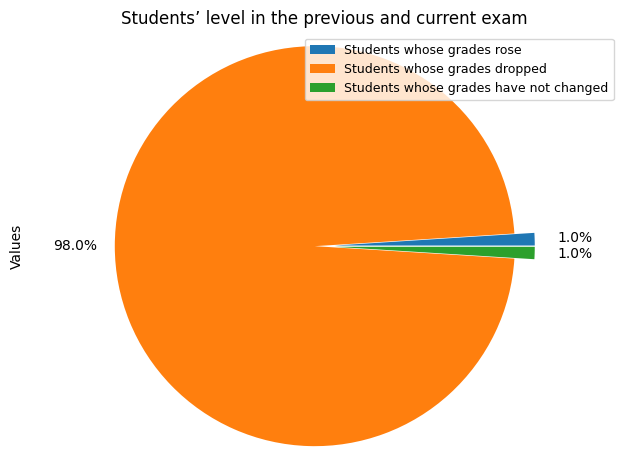

In [19]:
explode_list = [0.1, 0, 0.1]
Student_performance["Values"].plot(kind="pie",autopct='%1.1f%%',
                             pctdistance=1.2,labels=None, explode=explode_list)
plt.title('Students’ level in the previous and current exam')
plt.axis('equal')
plt.legend(labels=Student_performance.index, loc='upper right', fontsize=9)
plt.tight_layout()
plt.show()

> **Now it's time to explore what differentiates each of the three filters (increased, decreased, and unchanged scores) from each other and what sets them apart in the other features.**

> **To do this, we will use statistical analysis.
We’ll calculate the mean for each numerical feature in each filter, which will help us understand the differences in average values across the groups.**

In [20]:
stat_filters = pd.DataFrame({
    "Hours Studied": [filter1["Hours Studied"].mean(),
                           filter3["Hours Studied"].mean(),
                           filter2["Hours Studied"].mean()],
    "Previous Scores": [filter1["Previous Scores"].mean(),
                              filter3["Previous Scores"].mean(),
                             filter2["Previous Scores"].mean()],
    
    "Sleep Hours": [filter1["Sleep Hours"].mean(),
                         filter3["Sleep Hours"].mean(),
                        filter2["Sleep Hours"].mean()],
    "Sample Question Papers Practiced": [filter1["Sample Question Papers Practiced"].mean(),
                                              filter3["Sample Question Papers Practiced"].mean(),
                                             filter2["Sample Question Papers Practiced"].mean()],
    "Performance Index": [filter1["Performance Index"].mean(),
                               filter3["Performance Index"].mean(),
                              filter2["Performance Index"].mean()]
})
index=["Students whose grades rose",  "Students whose grades have not changed", "Students whose grades dropped"]
stat_filters.index = index
stat_filters = stat_filters.transpose()
stat_filters

,Students whose grades rose,Students whose grades have not changed,Students whose grades dropped
Hours Studied,8.960396,8.929293,4.912245
Previous Scores,72.297030,71.424242,69.396327
Sleep Hours,7.683168,7.515152,6.508776
Sample Question Papers Practiced,6.029703,5.444444,4.559694
Performance Index,73.960396,71.424242,54.868061


> **Now, after presenting the results of the comparison and visualizing them with a bar chart, it becomes clearer that:
The Hours Studied feature was almost the same for students whose grades rose and those whose grades remained the same, but there was a noticeable difference in the third filter (students whose grades dropped), where the study hours were significantly lower.
Similarly, other features showed distinct differences between the groups. For example, students whose grades rose had higher Previous Scores, more Sleep Hours, and practiced more Sample Question Papers than those whose grades dropped. The Performance Index was also much higher for students whose grades rose compared to the other two groups.**

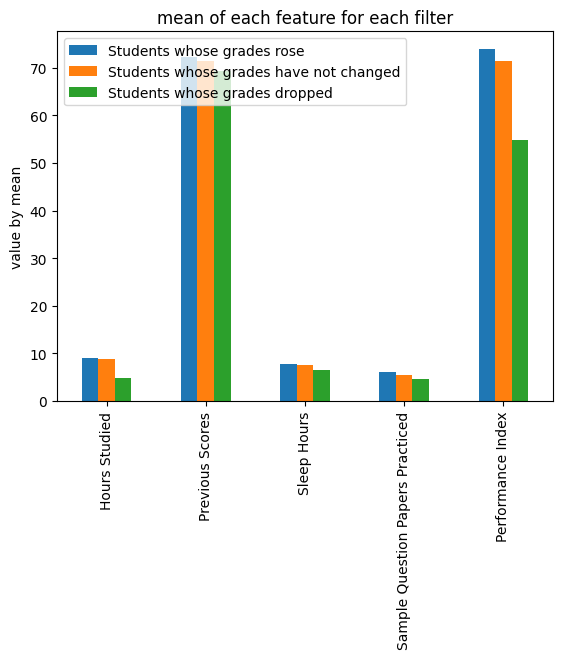

In [21]:
stat_filters.plot(kind="bar")
plt.title("mean of each feature for each filter")
plt.ylabel("value by mean")
plt.show()

> **After observing the differences between the numerical features, it’s time to explore the differences between the categorical features.**

> **To do this, we will use a pie chart to visualize the distribution of categories and identify any notable patterns or imbalances.**

> **After displaying the results, we notice that approximately one-third of the students whose grades increased did not participate in Extracurricular Activities, and the same proportion applies to those whose grades remained unchanged.
However, the situation differs for students whose grades dropped, where nearly half of them did not participate in Extracurricular Activities.
This indicates that participation in Extracurricular Activities alone may not have played a decisive role in the differences in grades, and we will explore this further in the EDA phase.**

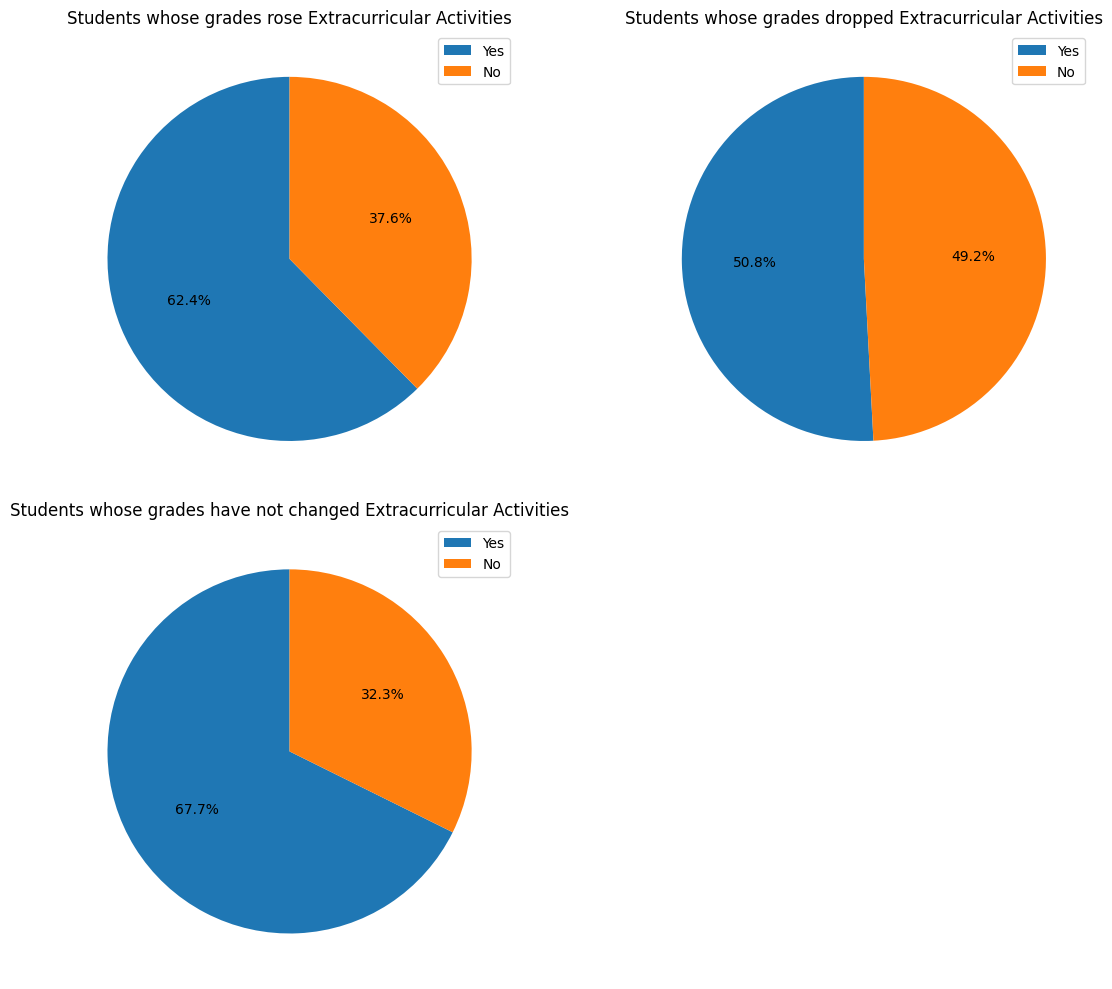

In [22]:
fig, axes = plt.subplots(2, 2, figsize = (12, 10))

axes[0, 0].pie((filter1["Extracurricular Activities"]).value_counts(),
               autopct='%1.1f%%',
               startangle=90)
axes[0, 0].set_title('Students whose grades rose Extracurricular Activities')
axes[0, 0].legend(labels = filter1["Extracurricular Activities"].unique(), loc="upper right")

axes[0, 1].pie((filter2["Extracurricular Activities"]).value_counts(),
               autopct='%1.1f%%',
               startangle=90)
axes[0, 1].set_title('Students whose grades dropped Extracurricular Activities')
axes[0, 1].legend(labels = filter2["Extracurricular Activities"].unique(), loc="upper right")

axes[1, 0].pie((filter3["Extracurricular Activities"]).value_counts(),
               autopct='%1.1f%%',
               startangle=90)
axes[1, 0].set_title('Students whose grades have not changed Extracurricular Activities')
axes[1, 0].legend(labels = filter3["Extracurricular Activities"].unique(), loc="upper right")

fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

# 4. Exploratory data analysis (EDA) 
**the process of examining and visualizing data to uncover patterns, relationships, and trends.**

> **In this phase, we will start with the numerical features to determine if there is a linear relationship between them and the target variable (Performance Index). This will involve using visualizations like scatter plots and calculating correlation coefficients to assess the strength and direction of the relationships. To achieve this, we will utilize the regplot function from the seaborn library for better visualization of linear trends.**

> **Secondly, we will move on to the categorical features to analyze their impact and association with the target variable. For this, we will use the boxplot visualization to observe how the target variable is distributed across different categories.**

> **Let’s begin with the first numerical feature: Hours Studied. From the plot, we can observe a positive correlation, indicating that as the number of hours studied increases, the Performance Index tends to increase as well. This suggests that more study hours are generally associated with better performance.**

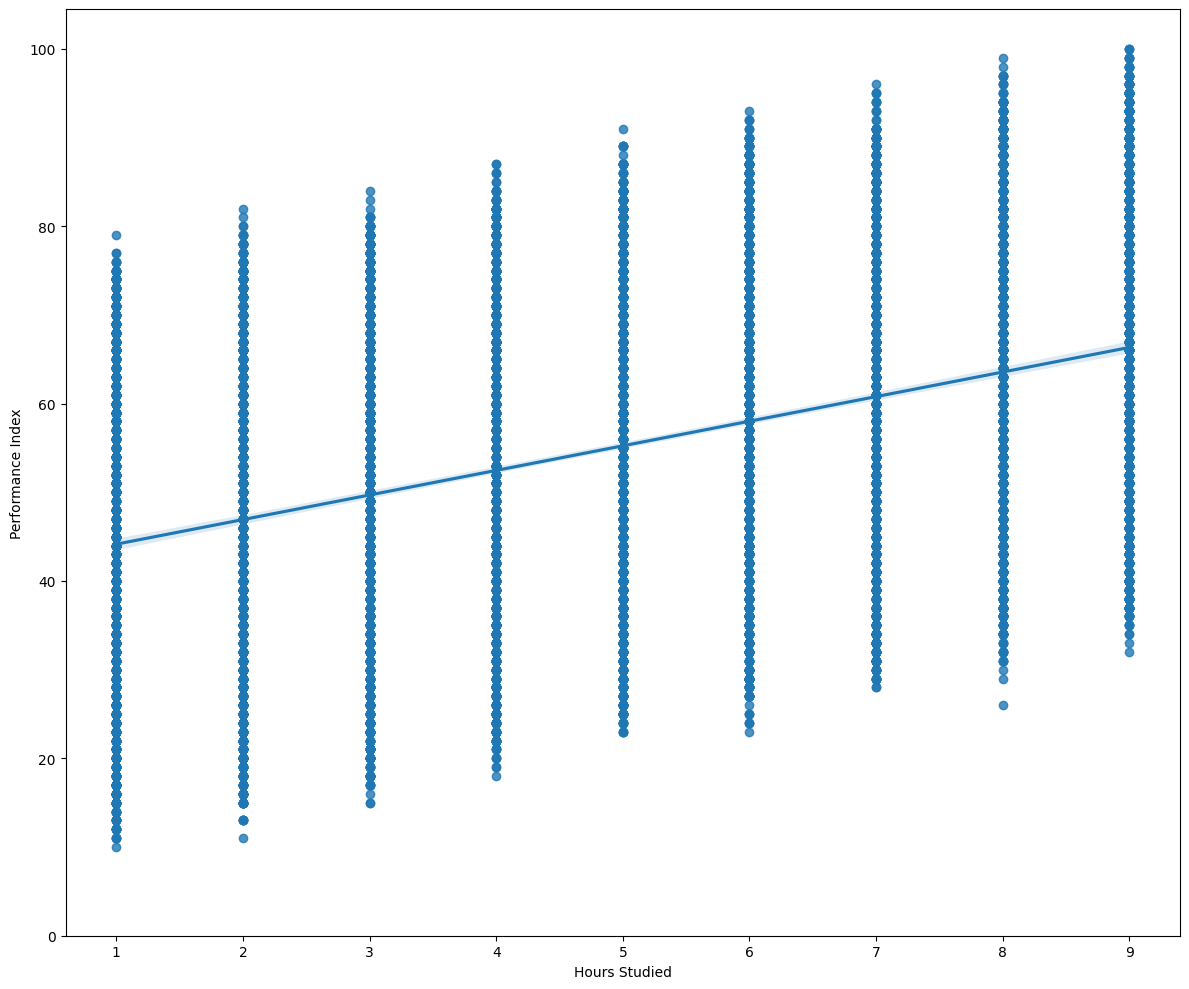

In [23]:
plt.figure(figsize = (12, 10))
sns.regplot(x = "Hours Studied", y = "Performance Index", data = data)
plt.ylim(0,)
plt.tight_layout()
plt.show()

> **Similarly, Previous Scores also show a positive correlation with the target variable (Performance Index). As the previous scores increase, the Performance Index tends to rise as well, suggesting that students with higher previous scores generally perform better in the current exam.**

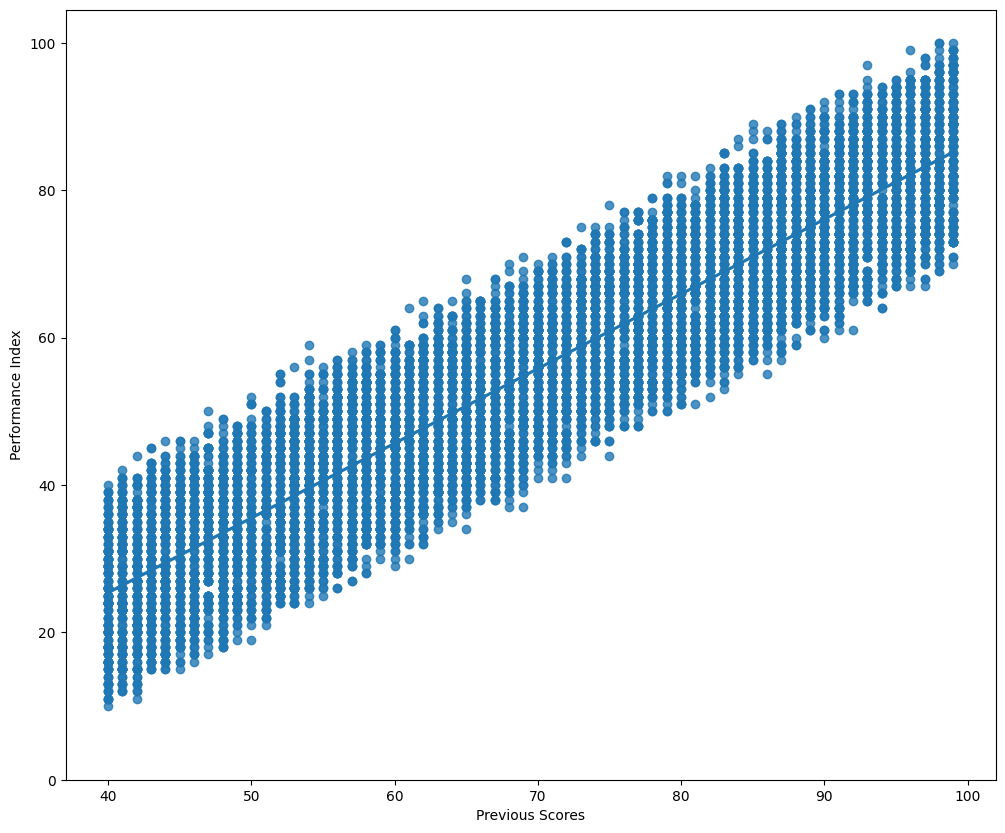

In [24]:
plt.figure(figsize = (12, 10))
sns.regplot(x = "Previous Scores", y = "Performance Index", data = data)
plt.ylim(0,)
plt.show()

> **In the Sleep Hours feature, it appears that the correlation with the target variable (Performance Index) is very weak, almost non-existent. This suggests that the amount of sleep does not have a strong influence on the students' performance in the current exam.**

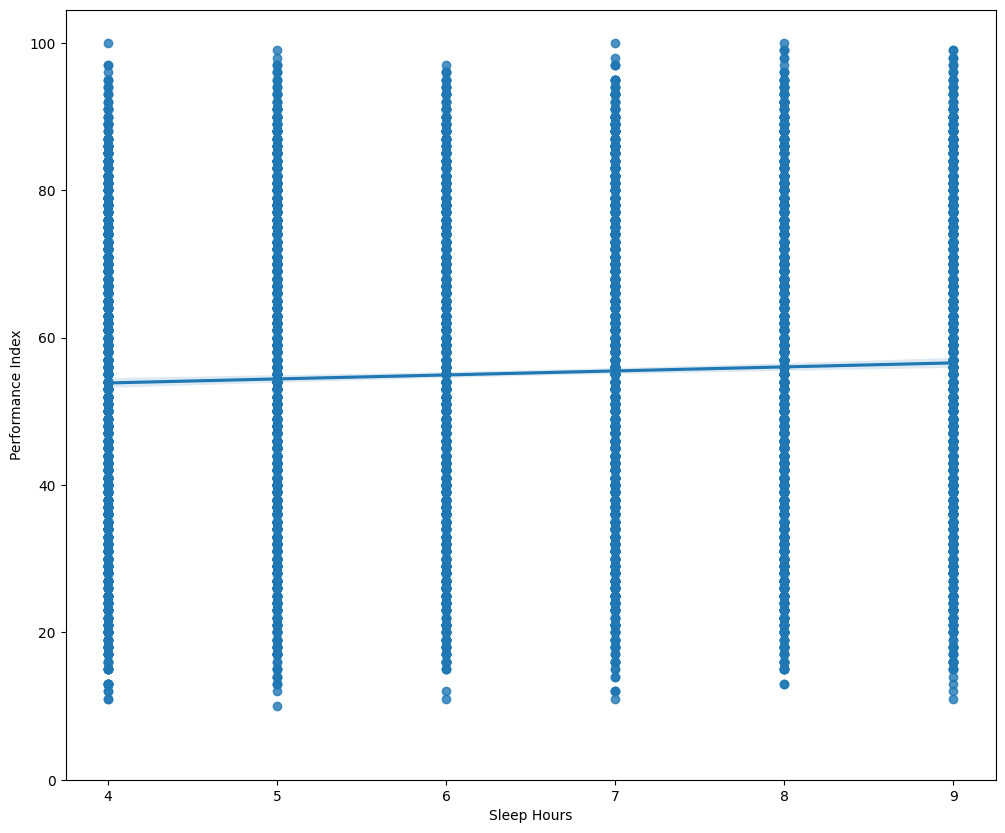

In [25]:
plt.figure(figsize = (12, 10))
sns.regplot(x = "Sleep Hours", y = "Performance Index", data = data)
plt.ylim(0,)
plt.show()

> **In the Sample Question Papers Practiced feature, it appears that the correlation with the target variable (Performance Index) is very weak, almost non-existent.**

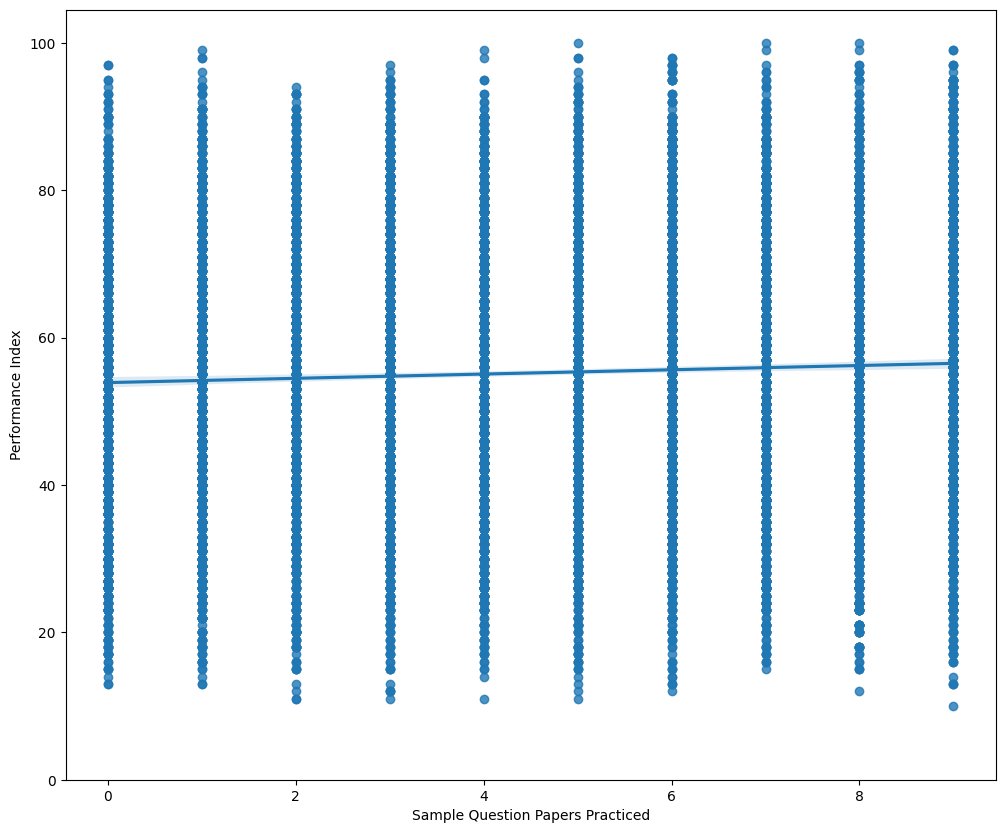

In [26]:
plt.figure(figsize = (12, 10))
sns.regplot(x = "Sample Question Papers Practiced", y = "Performance Index", data = data)
plt.ylim(0,)
plt.show()

> **Regarding the Extracurricular Activities feature, when visualized using a boxplot, it becomes clear that there is no significant variance between the categories. This suggests that participation in extracurricular activities does not have a noticeable effect on the distribution of the Performance Index.**

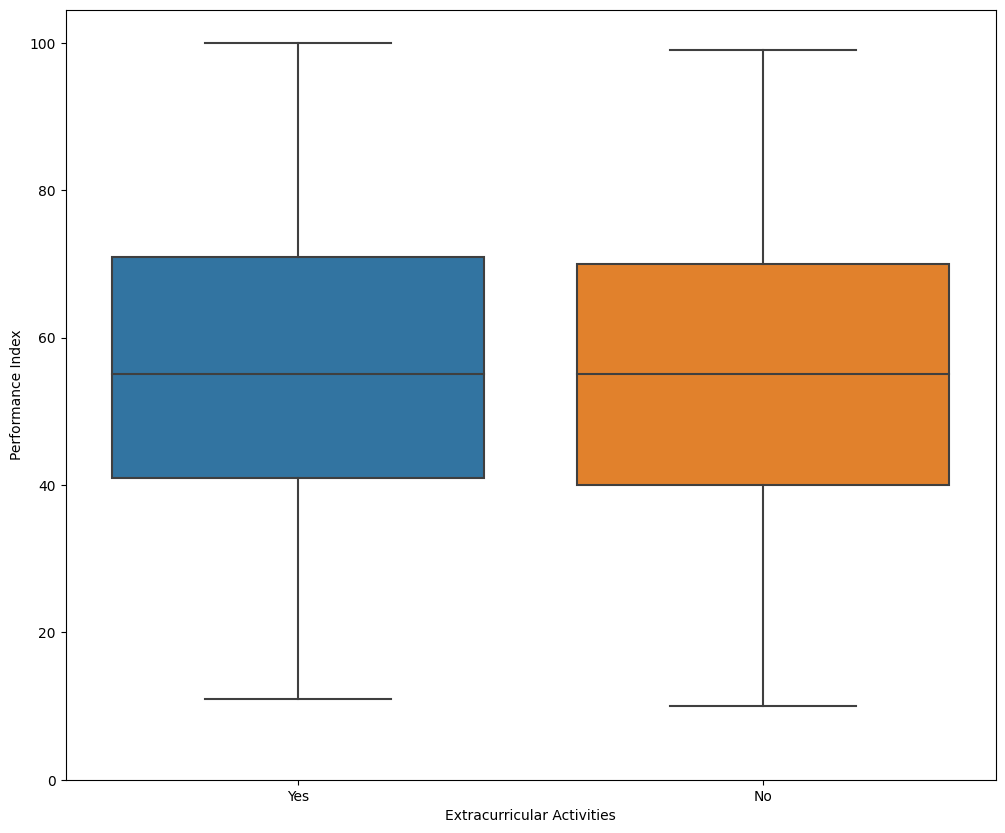

In [27]:
plt.figure(figsize = (12, 10))
sns.boxplot(x = "Extracurricular Activities", y = "Performance Index", data = data)
plt.ylim(0,)
plt.show()

> **Now, let's display the numerical values of the correlation between the features and the target variable using the corr() function. This will provide a clearer understanding of the strength and direction of the relationships between all numerical features and the Performance Index.**

> **In correlation analysis, the relationship is considered strong positive as the value approaches 1
strong negative relationship is indicated when the correlation value approaches -1**

> **From the correlation results, Previous Scores has the strongest positive correlation with the target variable (Performance Index) at 0.92
> Additionally, Hours Studied has a relatively weak positive correlation with the target variable (Performance Index), with a correlation value of 0.32
> For the remaining features, the correlation with the target variable (Performance Index) is almost negligible**

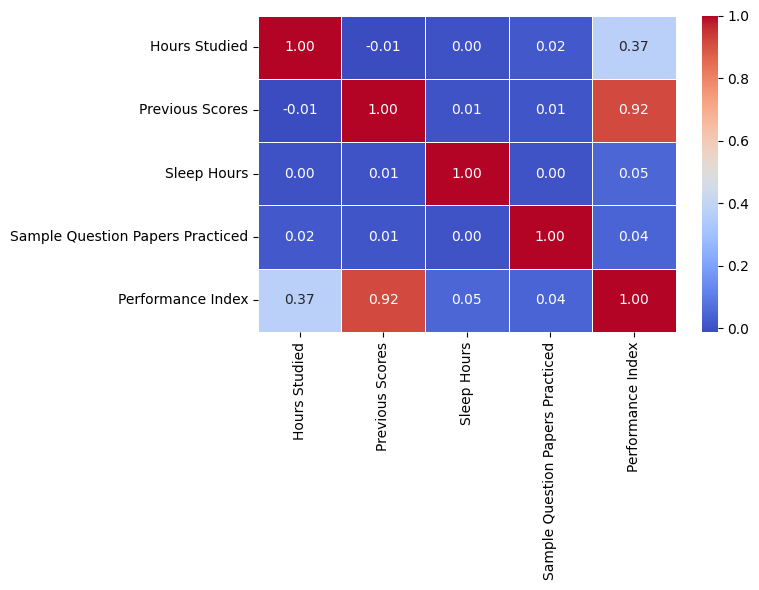

In [28]:
corr_data = data.drop("Extracurricular Activities", axis = 1)
correl = corr_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correl, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.tight_layout()
plt.show()

> **Let’s use the p-value to determine whether the relationship between each feature and the target variable (Performance Index) is statistically significant. This will help us understand if the observed correlations are the result of chance or represent meaningful relationships.**

> **A low p-value (typically less than 0.05) indicates that the correlation is statistically significant
A high p-value (greater than 0.05) suggests that the correlation is not statistically significant**

> **After displaying the results of the p-values, we notice that the values for all columns are smaller than 0.05. This indicates that the relationship between the columns and the target variable (Performance Index) is statistically significant and not the result of chance.
However, despite the statistical significance, the correlation for most of these columns is nearly negligible, meaning that while the relationships are not random, they may have little to no practical impact on the target variable.**

> **In summary, the features are statistically significant, but their effect might not be practically meaningful.**

In [29]:
for i in corr_data.columns.tolist():
    print(i)
    correlation, p_value = stats.pearsonr(corr_data[i], corr_data['Performance Index'])
    print(f"correlation = {correlation}, p_value = {p_value}")

Hours Studied
correlation = 0.3737303506987236, p_value = 0.0
Previous Scores
correlation = 0.9151891412264475, p_value = 0.0
Sleep Hours
correlation = 0.04810583543435262, p_value = 1.4885369617939595e-06
Sample Question Papers Practiced
correlation = 0.04326832665907979, p_value = 1.5025193128408894e-05
Performance Index
correlation = 1.0, p_value = 0.0


# 5. Feature Selection 
**is the process of identifying the most relevant features (columns) in the dataset that have the most significant impact on the target variable.**

> **After displaying the results of the correlation and p-value, it becomes clear that the most impactful columns are Previous Scores and Hours Studied, and these should be selected for modeling to predict the target (Performance Index).**

> **However, if we were to include all the columns in the model, would it affect accuracy?
The answer, in this case, is no. Since the relationship between most features and the target variable is either very weak or nonexistent, their inclusion would not significantly impact the model's accuracy. This is because these features do not play a meaningful role in predicting the target variable in the first place.**

# 6. Predictive analysis (Modeling)
**process of using statistical and machine learning models to make predictions based on data**

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

> **To define the independent data, we will select all columns except for the target variable (Performance Index).**

In [31]:
X = data.drop("Performance Index", axis = 1)
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5


> **Now, we will define the dependent data (target variable)**

In [32]:
y = data["Performance Index"]
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

> **After that, we will split the data into training and testing sets. The testing set will take 20% of the data, while the remaining 80% will be used for training the model.**

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## To preprocess the data, we will:

Convert the categorical (non-numeric) features (like Extracurricular Activities) into binary values (0 or 1). This can be done by applying encoding techniques such as Label Encoding or One-Hot Encoding. In this case, we can use Label Encoding for binary features.

Scale the numerical features (like Hours Studied, Previous Scores, etc.) so that all values are in a similar range, typically between 0 and 1. This ensures that no feature dominates the others due to its scale. We will use Min-Max Scaling for this purpose. 

In [34]:
categorical_columns = X.select_dtypes(include=['object']).columns  
numerical_columns = X.select_dtypes(exclude=['object']).columns 

## Modeling with Multiple Linear Regression (MLR) 

What is a Pipeline?
A Pipeline in machine learning is a way to streamline the process of applying a series of transformations and models in a structured way. It ensures that all the preprocessing steps (like scaling or encoding) and the model are applied in sequence, and it simplifies the process of training, evaluation, and prediction.

In [35]:

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_columns), 
        ('scale', StandardScaler(), numerical_columns)                
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('model', LinearRegression())   
])

In [36]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  Index(['Extracurricular Activities'], dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object'))])),
                ('model', LinearRegression())])

> **Predict test data**

In [37]:
yhat_mlr = pipeline.predict(x_test)

## Model Evaluation (MLR)  

> **We can observe from the plot that the predicted values and the actual values are very close to each other, indicating that the model's performance is excellent.**

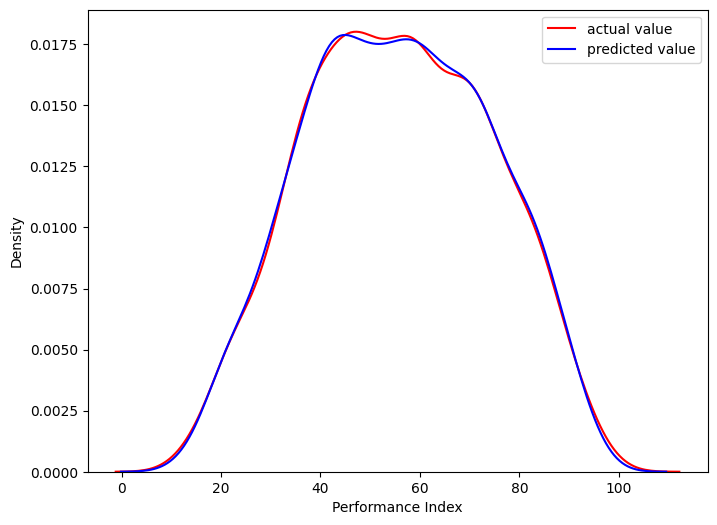

In [38]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

plt.figure(figsize=(8, 6))
ax = sns.kdeplot(y_test, color='red', label='actual value')
sns.kdeplot(yhat_mlr, color='blue', label='predicted value', ax=ax)
plt.legend()
plt.show()

> **We will also calculate the Mean Error and R-squared (R²) to evaluate the model. We noticed that the R² value is 0.988, which is very close to 1, indicating that the model explains 98.8% of the variance in the data, which is excellent performance.**

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse_mlr = mean_squared_error(y_test, yhat_mlr)
r2_mlr = r2_score(y_test, yhat_mlr)
print(f"MSE = {mse_mlr}, r2 = {r2_mlr}")

MSE = 4.105609215835834, r2 = 0.9880686410711422


## Modeling with Suport Vector Machine (SVR)  

In [40]:
from sklearn.svm import SVR

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR(kernel='linear', C=1, epsilon=0.1))
])
pipeline.fit(x_train, y_train)
yhat_svr = pipeline.predict(x_test)

## Model Evaluation (SVR)  

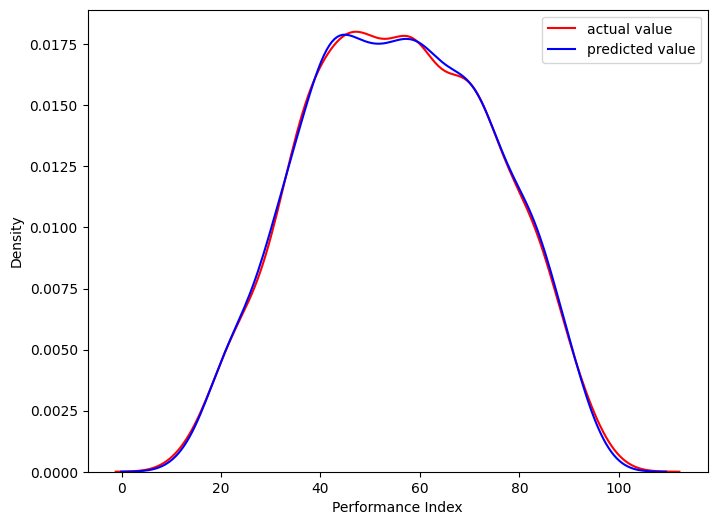

In [41]:
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(y_test, color='red', label='actual value')
sns.kdeplot(yhat_svr, color='blue', label='predicted value', ax=ax)
plt.legend()
plt.show()

In [42]:
mse_svr = mean_squared_error(y_test, yhat_svr)
r2_svr = r2_score(y_test, yhat_svr)
print(f"MSE = {mse_svr}, r2 = {r2_svr}")

MSE = 4.116490584324289, r2 = 0.9880370185989955


## Modeling with Polynomial Regression

In [43]:
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('polynomial', PolynomialFeatures(degree = 3)),
    ('model', LinearRegression())   
])

pipeline.fit(x_train, y_train)
yhat_poly = pipeline.predict(x_test)

## Model Evaluation (Polynomial Regression)  

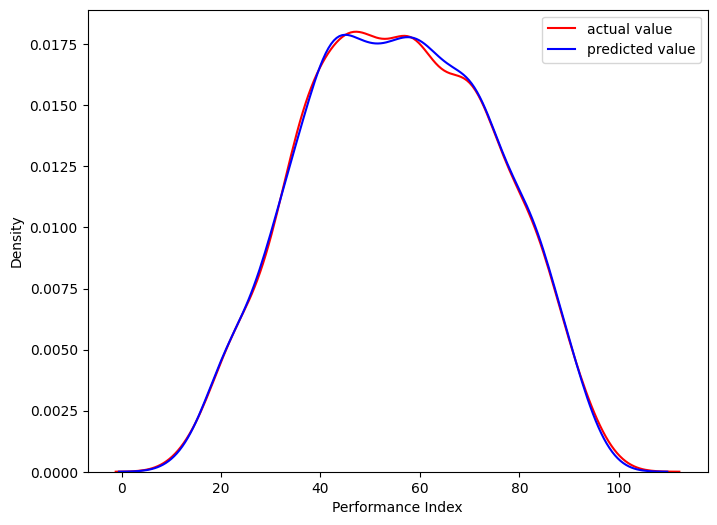

In [44]:
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(y_test, color='red', label='actual value')
sns.kdeplot(yhat_poly, color='blue', label='predicted value', ax=ax)
plt.legend()
plt.show()

In [45]:
mse_poly = mean_squared_error(y_test, yhat_poly)
r2_poly = r2_score(y_test, yhat_poly)
print(f"MSE = {mse_poly}, r2 = {r2_poly}")

MSE = 4.137826462268829, r2 = 0.9879750141547253


## Modeling with Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('model', RandomForestRegressor())   
])

pipeline.fit(x_train, y_train)
yhat_rand = pipeline.predict(x_test)


## Model Evaluation (Random Forest) 

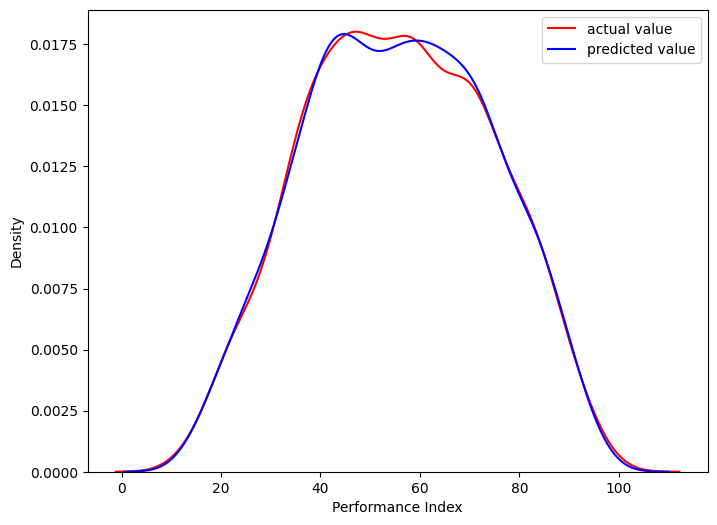

In [47]:
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(y_test, color='red', label='actual value')
sns.kdeplot(yhat_rand, color='blue', label='predicted value', ax=ax)
plt.legend()
plt.show()

In [48]:
mse_rand = mean_squared_error(y_test, yhat_rand)
r2_rand = r2_score(y_test, yhat_rand)
print(f"MSE = {mse_rand}, r2 = {r2_rand}")

MSE = 5.423620419892315, r2 = 0.9842383533060042


## compare the evaluation of the models and select the best one 

In [49]:
index=["MSE", "R2"]
model_eva = {"Mlr":[mse_mlr, r2_mlr],
             "SVR":[mse_svr, r2_svr],
             "PR":[mse_poly, r2_poly],
             "RFR":[mse_rand, r2_rand]}

model_eva = pd.DataFrame(model_eva)
model_eva.index = index
model_eva = model_eva.transpose()
model_eva

,MSE,R2
Mlr,4.105609,0.988069
SVR,4.116491,0.988037
PR,4.137826,0.987975
RFR,5.423620,0.984238


In [50]:
best_model = model_eva[(model_eva["MSE"] == model_eva["MSE"].min()) & (model_eva["R2"] == model_eva["R2"].max())]
best_model

,MSE,R2
Mlr,4.105609,0.988069


> ### In the end, we find that the best model for prediction, even though all models are close in accuracy, is the Multiple Linear Regression (MLR)